In [ ]:
! python --version

### Download the paper "Attention is All You Need" from the following link:

In [ ]:
# ! wget https://arxiv.org/pdf/1706.03762.pdf -O ../data/attention_is_all_you_need.pdf

In [1]:
from unstructured.partition.pdf import partition_pdf

output_path = "../data/"
file_path = output_path + "attention_is_all_you_need.pdf"

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,             # extract tables
    strategy="hi_res",                      # mandatory to infer tables
    extract_image_block_types=["Image", "Table"],    # Add 'Table' to list to extract image of tables
    extract_image_block_to_payload=True,    # if true, will extract base64 for API usage
    chunking_strategy="by_title",           # or 'basic'
    max_characters=10000,                   # defaults to 500
    combine_text_under_n_chars=2000,        # defaults to 0
    new_after_n_chars=6000,
)

/Users/josereyes/Dev/multimodal-rag-pdf/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
len(chunks)

12

In [3]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [4]:
import json


for i in range(5):
    print(json.dumps(chunks[i].to_dict(), indent=2))

{
  "type": "CompositeElement",
  "element_id": "16295d088ec2873d994ec321914a566e",
  "text": "3\n\n2023\n\n2\n\n0\n\n2\n\ng u A 2 ] L C . s c [ 7 v 2 6 7 3 0 . 6 0\n\n7\n\n1\n\n:\n\nv\n\narXiv\n\ni\n\nX\n\nr\n\na\n\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\n\nAttention Is All You Need\n\nAshish Vaswani\u2217\n\nGoogle Brain\n\navaswani@google.com\n\nNoam Shazeer\u2217 Google Brain noam@google.com\n\nNiki Parmar\u2217 Google Research nikip@google.com\n\nJakob Uszkoreit\u2217\n\nGoogle Research usz@google.com\n\nLlion Jones\u2217\n\nGoogle Research llion@google.com\n\nAidan N. Gomez\u2217 \u2020 University of Toronto aidan@cs.toronto.edu\n\n\u0141ukasz Kaiser\u2217 Google Brain lukaszkaiser@google.com\n\nIllia Polosukhin\u2217 \u2021\n\nillia.polosukhin@gmail.com\n\nAbstract\n\nThe dominant sequence transduction models are based on complex recurrent or con

In [5]:
chunks[5].metadata.orig_elements[8].to_dict()

{'type': 'Table',
 'element_id': '08e66a1b-0789-4fb8-b89b-2885f4f6ff21',
 'text': 'Layer Type Complexity per Layer Sequential Maximum Path Length Operations Self-Attention O(n2 · d) O(1) O(1) Recurrent O(n · d2) O(n) O(n) Convolutional O(k · n · d2) O(1) O(logk(n)) Self-Attention (restricted) O(r · n · d) O(1) O(n/r)',
 'metadata': {'detection_class_prob': 0.928255021572113,
  'coordinates': {'points': ((320.3292541503906, 312.45477294921875),
    (320.3292541503906, 519.1640014648438),
    (1363.9827880859375, 519.1640014648438),
    (1363.9827880859375, 312.45477294921875)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2024-04-13T09:47:34',
  'text_as_html': '<table><thead><tr><th>Layer Type</th><th>Complexity per Layer</th><th>Sequential Operations</th><th>Maximum Path Length</th></tr></thead><tbody><tr><td>Self-Attention</td><td>O(n? - d)</td><td>O(1)</td><td>O(1)</td></tr><tr><td>Recurrent</td><td>O(n- d?)</td><td>O(n)</td><td>

In [6]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '30102248-efc3-4466-9b45-1727c9a631f0',
 'text': '',
 'metadata': {'coordinates': {'points': ((486.0, 261.1805555555558),
    (486.0, 614.7805555555556),
    (664.0, 614.7805555555556),
    (664.0, 261.1805555555558)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2024-04-13T09:47:34',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 4,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFiALIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQE

In [7]:
# separate tables from texts
tables_info = []
composites = []

for chunk in chunks:
    if "CompositeElement" in str(type((chunk))):
        composites.append(chunk)

In [8]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [9]:

def get_tables_info(chunks):
    tables_info = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_elements = chunk.metadata.orig_elements
            for el in chunk_elements:
                if "Table" in str(type(el)):
                    tables_info.append(
                        {
                            "text_as_html": el.metadata.text_as_html,
                            "image_base64": el.metadata.image_base64,
                        })
    return tables_info

tables_info = get_tables_info(chunks)

In [10]:
len(tables_info)

4

In [11]:
tables_info[3]

{'text_as_html': '<table><thead><tr><th>Parser</th><th>Training</th><th>WSJ 23 F1</th></tr></thead><tbody><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>WSJ only, discriminative</td><td>88.3</td></tr><tr><td>Petrov et al. (2006)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Zhu et al. (2013) (40)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Dyer et al. (2016)</td><td>WSJ only, discriminative</td><td>91.7</td></tr><tr><td>Transformer (4 layers)</td><td>WSJ only, discriminative</td><td>91.3</td></tr><tr><td>Zhu et al. (2013) [40]</td><td>semi-supervised</td><td>913</td></tr><tr><td>Huang &amp; Harper (2009)</td><td>semi-supervised</td><td>91.3</td></tr><tr><td>McClosky et al. (2006)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Transformer (4 layers)</td><td>semi-supervised</td><td>92.7</td></tr><tr><td>Luong et al. (2015) 23]</td><td>multi-task</td><td>

In [12]:
tables_info[3]["text_as_html"]

'<table><thead><tr><th>Parser</th><th>Training</th><th>WSJ 23 F1</th></tr></thead><tbody><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>WSJ only, discriminative</td><td>88.3</td></tr><tr><td>Petrov et al. (2006)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Zhu et al. (2013) (40)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Dyer et al. (2016)</td><td>WSJ only, discriminative</td><td>91.7</td></tr><tr><td>Transformer (4 layers)</td><td>WSJ only, discriminative</td><td>91.3</td></tr><tr><td>Zhu et al. (2013) [40]</td><td>semi-supervised</td><td>913</td></tr><tr><td>Huang &amp; Harper (2009)</td><td>semi-supervised</td><td>91.3</td></tr><tr><td>McClosky et al. (2006)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Transformer (4 layers)</td><td>semi-supervised</td><td>92.7</td></tr><tr><td>Luong et al. (2015) 23]</td><td>multi-task</td><td>93.0</td></tr><tr

In [13]:
composites[1].metadata.orig_elements

In [14]:
print(composites[1].metadata.orig_elements[0].to_dict())

{'type': 'Title', 'element_id': '98da8f51-952a-4a07-8f3f-c2ccddc4a0ce', 'text': '1 Introduction', 'metadata': {'detection_class_prob': 0.9067492485046387, 'coordinates': {'points': ((295.1142272949219, 201.40676888888876), (295.1142272949219, 234.61565777777764), (536.1755981445312, 234.61565777777764), (536.1755981445312, 201.40676888888876)), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2024-04-13T09:47:34', 'filetype': 'PPM', 'languages': ['eng'], 'page_number': 2}}


In [15]:
len(composites)

12

In [16]:
images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAOAAmADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5OTxVqWp6pdWPhjSI75LSQw3N/d3PkW6yjrGpCszsO

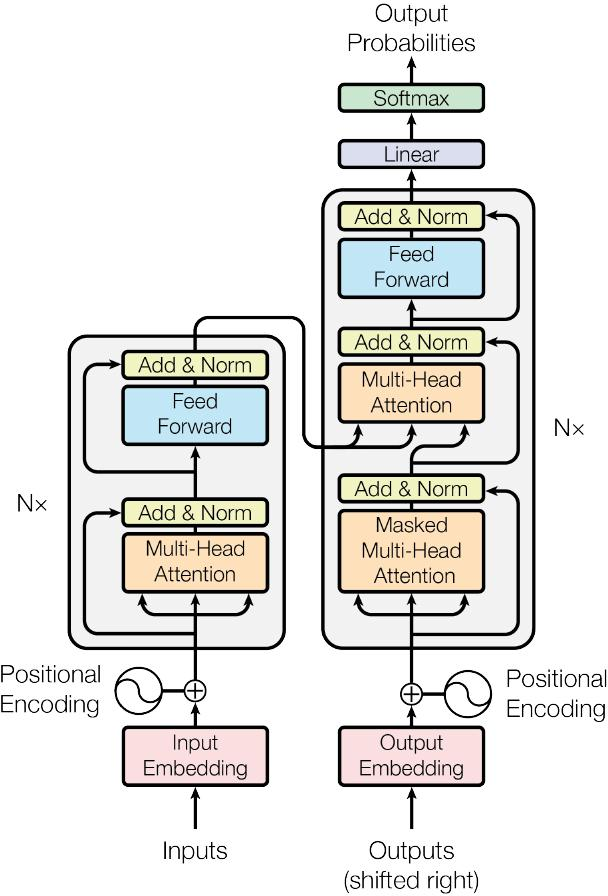

In [17]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

In [20]:
from pydantic import BaseModel, Field

class NodeSummaryResponse(BaseModel):
    """
    Response model for summary object of a node 
    """
    summary: str = Field(
        ...,
        description="A concise summary of the table or text. 5 sentences max.")

SYSTEM_PROMPT = """
You are an expert assistant tasked with summarizing text and tables.
"""

class NodeSummariser:
    """
    Enhanced document summariser
    """
    def __init__(self, client):
        self.client = client

    def summarise(self, document_text: str) -> tuple[NodeSummaryResponse, dict]:
        """
        Summarise a document text
        """
        try:
            summary, completion = self.client.chat.completions.create_with_completion(
                system=SYSTEM_PROMPT,
                messages=[
                    {
                        "role": "user",
                        "content": f"Give a very concise summary of the following text or table: {document_text}. \
                            Respond only with the summary, no additionnal comment. Do not start your message by \
                            saying 'Here is a summary' or anything like that. Just give the summary as it is. Don't even \
                            mention the title of the source."
                    }
                    ],
                response_model = NodeSummaryResponse
            )

            return summary, completion
        except Exception as e:
            return e

In [21]:
from dotenv import load_dotenv

load_dotenv(verbose=True, dotenv_path=".env")

True

In [22]:
import os
import anthropic
import instructor

client = anthropic.AnthropicBedrock(
    aws_access_key=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    aws_session_token=os.getenv("AWS_SESSION_TOKEN"),
    aws_region=os.getenv("AWS_DEFAULT_REGION"),
)

MODEL_ID_HAIKU = "anthropic.claude-3-haiku-20240307-v1:0"
MODEL_ID_SONNET = "anthropic.claude-3-5-sonnet-20241022-v2:0"
USE_MODEL = MODEL_ID_SONNET
# USE_MODEL = MODEL_ID_HAIKU

# Regarding the LLM model choice, I would start with the cheapest option (Haiku) first. Depending on the tasks, the smallest 
# model might be sufficient. You will have to do some trial and error here. I found that the smallest model at times will have
# difficulty following certain instructions. For example, asking the LLM to summarise a body of text and constraining the
# summary say from minimum 100 and maximum 500 characters, the smallest model will sometimes fail to generate a summary
# that is within the character count constraints. In such cases, you might have to try a larger model.

# we are using Instructor (https://github.com/instructor-ai/instructor)
instructor_client = instructor.from_anthropic(
    client,
    max_tokens=1024,
    model=USE_MODEL
)



In [23]:
from pydantic import BaseModel

# Define your desired output structure
class UserInfo(BaseModel):
    name: str
    age: int

user_info = instructor_client.chat.completions.create(
    response_model=UserInfo,
    messages=[{"role": "user", "content": "John Doe is 30 years old."}]
    )

print(user_info.name)
#> John Doe
print(user_info.age)
#> 30

John Doe
30


In [71]:
from IPython.display import Markdown, display

for i, item in enumerate(composites):
    node, _ = NodeSummariser(instructor_client).summarise(item)
    display(Markdown(f"**Node {i+1}**:"))
    display(Markdown(node.summary))

**Node 1**:

This is the title page and abstract of a seminal paper introducing the Transformer architecture. The paper, authored by researchers primarily from Google Brain and Google Research, proposes a new neural network architecture based solely on attention mechanisms, eliminating the need for recurrence and convolutions. The model achieved state-of-the-art results on English-to-German translation (28.4 BLEU) and English-to-French translation (41.8 BLEU), while requiring significantly less training time than previous models.

**Node 2**:

The text introduces the Transformer architecture as a revolutionary approach in sequence modeling that completely replaces traditional recurrent neural networks with attention mechanisms. While RNNs and LSTMs have been the standard for tasks like language modeling and translation, their sequential nature limits parallelization. The Transformer addresses this by using self-attention to model dependencies between input and output positions in constant time, enabling significantly more parallel processing. The architecture achieves state-of-the-art translation results with just twelve hours of training on eight P100 GPUs.

**Node 3**:

This text describes the Transformer model architecture, which follows an encoder-decoder structure. The encoder maps input sequences to continuous representations, while the decoder generates output sequences auto-regressively. Both encoder and decoder consist of 6 identical layers, with the encoder using multi-head self-attention and feed-forward networks, while the decoder adds a third multi-head attention layer over encoder outputs. The architecture employs residual connections and layer normalization, with all layers producing 512-dimensional outputs. The decoder includes masking to prevent attention to future positions.

**Node 4**:

The text explains Scaled Dot-Product Attention, a key component of transformers. It maps queries and key-value pairs to outputs using weighted sums, where weights are determined by compatibility between queries and keys. The process involves computing dot products of queries with keys, scaling by 1/√dk, applying softmax, and multiplying with values. This approach is compared to additive attention, with dot-product attention being faster but requiring scaling for larger dimension values to prevent softmax gradient issues.

**Node 5**:

Multi-head attention projects queries, keys, and values h times with different linear projections, performing parallel attention functions. The model uses 8 parallel attention heads, each with reduced dimensionality of 64, maintaining similar computational cost to single-head attention. The Transformer applies multi-head attention in three ways: encoder-decoder attention allowing decoder positions to attend to input sequence, self-attention in the encoder enabling all positions to attend to previous layer, and masked self-attention in the decoder permitting positions to attend only to prior positions.

**Node 6**:

The text describes key components of the transformer architecture: position-wise feed-forward networks that apply two linear transformations with ReLU activation to each position, embedding layers that convert tokens to vectors, and positional encodings that inject sequence order information. The feed-forward network operates with input/output dimension of 512 and inner-layer dimension of 2048. A comparison table shows different layer types' complexity, with self-attention having O(n²·d) complexity but O(1) sequential operations. The positional encoding uses sine and cosine functions of different frequencies, allowing the model to learn relative positions and extrapolate to longer sequences.

**Node 7**:

The text compares self-attention layers with recurrent and convolutional layers across three key aspects: computational complexity, parallelization capability, and path length between dependencies. Self-attention layers offer constant sequential operations and connect all positions directly, while recurrent layers require O(n) sequential operations. Self-attention is computationally more efficient when sequence length is smaller than representation dimensionality. For very long sequences, restricted self-attention within a neighborhood could be used. Additionally, self-attention provides better model interpretability through observable attention distributions related to sentence structure.

**Node 8**:

Training was conducted on WMT 2014 datasets using 8 NVIDIA P100 GPUs, with base models trained for 100,000 steps (12 hours) and big models for 300,000 steps (3.5 days). The Adam optimizer was used with a variable learning rate, incorporating warmup steps. Three regularization techniques were employed, including residual dropout and label smoothing. The Transformer models achieved superior BLEU scores compared to previous state-of-the-art models on English-German and English-French translation tasks, while requiring significantly less computational resources.

**Node 9**:

The Transformer model achieved state-of-the-art results in machine translation tasks. On English-to-German translation, the big transformer model reached 28.4 BLEU score, exceeding previous models by 2.0 BLEU. For English-to-French translation, it achieved 41.0 BLEU score at 1/4 the training cost of previous models. Training utilized beam search, checkpoint averaging, and specific hyperparameters. Various architecture variations were tested, with model dimensions, attention heads, and dropout rates affecting performance.

**Node 10**:

The text discusses experimental results in transformer model configurations and English constituency parsing. Various parameters were tested including attention heads, key dimensions, and model sizes, with findings showing that single-head attention performs worse, and larger models with dropout generally perform better. The transformer model achieved strong results in parsing tasks, outperforming most previous approaches when trained on WSJ data alone and achieving state-of-the-art performance of 92.7 F1 in semi-supervised settings, demonstrating effective generalization to structural prediction tasks.

**Node 11**:

The Transformer is introduced as the first sequence transduction model using only attention mechanisms instead of recurrent layers. It achieves superior training speed compared to recurrent/convolutional architectures and sets new state-of-the-art results on English-to-German and English-to-French translation tasks. The authors plan to extend the model to non-text modalities and explore local attention mechanisms for handling large inputs like images and video. They aim to make generation less sequential and have made their code publicly available.

**Node 12**:

Three figures demonstrate attention mechanisms in a transformer model analyzing English text. Figure 3 shows encoder self-attention in layer 5, highlighting how attention heads track long-distance dependencies between words like "making" and its related phrase. Figure 4 reveals two attention heads involved in anaphora resolution, specifically showing sharp attention patterns for the word "its". Figure 5 displays how different attention heads in layer 5 learn distinct sentence structure-related tasks, with clear visualization of attention patterns across various words in the text.

In [74]:
for i, item in enumerate(tables_info):
    node, _ = NodeSummariser(instructor_client).summarise(item)
    display(Markdown(f"**Table {i+1}**:"))
    display(Markdown(item["text_as_html"]))
    display(Markdown(f"**Table {i+1} Summary**:"))
    display(Markdown(node.summary))

**Table 1**:

<table><thead><tr><th>Layer Type</th><th>Complexity per Layer</th><th>Sequential Operations</th><th>Maximum Path Length</th></tr></thead><tbody><tr><td>Self-Attention</td><td>O(n? - d)</td><td>O(1)</td><td>O(1)</td></tr><tr><td>Recurrent</td><td>O(n- d?)</td><td>O(n)</td><td>O(n)</td></tr><tr><td>Convolutional</td><td>O(k-n-d?)</td><td>O(1)</td><td>O(logy(n))</td></tr><tr><td>Self-Attention (restricted)</td><td>O(r-n-d)</td><td>ol)</td><td>O(n/r)</td></tr></tbody></table>

**Table 1 Summary**:

The table compares different layer types - Self-Attention, Recurrent, Convolutional, and restricted Self-Attention - across three metrics: complexity per layer, sequential operations, and maximum path length. Self-Attention layers have O(n² - d) complexity with O(1) sequential operations and path length. Recurrent layers show O(n-d²) complexity with O(n) operations and path length. Convolutional layers have O(k-n-d²) complexity with O(1) operations and O(log(n)) path length. Restricted Self-Attention demonstrates O(r-n-d) complexity with O(1) operations and O(n/r) path length.

**Table 2**:

<table><thead><tr><th>Model</th><th>EN-DE</th><th>BLEU EN-FR</th><th>Training EN-DE</th><th>Cost (FLOPs) EN-FR</th></tr></thead><tbody><tr><td colspan="5">ByteNet [18] 23.75</td></tr><tr><td>Deep-Att + PosUnk</td><td></td><td>39.2</td><td></td><td>1.0 - 107°</td></tr><tr><td>GNMT + RL 8]</td><td>24.6</td><td>39.92</td><td>2.3-10!9</td><td>1.4-1070</td></tr><tr><td>ConvS28S [9]</td><td>25.16</td><td>40.46</td><td>9.6-10'%</td><td>1.5-1070</td></tr><tr><td>MoE</td><td>26.03</td><td>40.56</td><td>2.0-10'9</td><td>1.2. 1079</td></tr><tr><td>Deep-Att + PosUnk Ensemble</td><td></td><td>40.4</td><td></td><td>8.0 - 107°</td></tr><tr><td>GNMT + RL Ensemble (33</td><td>26.30</td><td>41.16</td><td>1.8-1079</td><td>1.1- 1074</td></tr><tr><td>ConvS2S Ensemble [9]</td><td>26.36</td><td>41.29</td><td>7.7-10'9</td><td>1.2.10?!</td></tr><tr><td>Transformer (base model)</td><td>27.3</td><td>38.1</td><td>3.3-</td><td>1018</td></tr><tr><td>Transformer (big)</td><td>28.4</td><td>41.8</td><td>2.3.</td><td>1019</td></tr></tbody></table>

**Table 2 Summary**:

The table compares different translation models' performance on English-to-German (EN-DE) and English-to-French (EN-FR) translation tasks. Models include ByteNet, Deep-Att, GNMT+RL, ConvS2S, MoE, and Transformer variants. The Transformer models (base and big) achieve competitive or superior BLEU scores compared to previous architectures. The big Transformer model achieves the highest scores of 28.4 for EN-DE and 41.8 for EN-FR. Training costs and computational requirements (FLOPs) are also listed for comparison.

**Table 3**:

<table><thead><tr><th></th><th>N</th><th>dyoast</th><th>de</th><th>Rh</th><th>de</th><th>dy</th><th>Parop</th><th>ets</th><th>Game</th><th>| deny</th><th></th><th>dev).</th></tr></thead><tbody><tr><td>base</td><td>| 6</td><td>512</td><td>2048</td><td>8</td><td>64</td><td>64</td><td>0.1</td><td>O01</td><td>100K</td><td>| 4.92</td><td>25.8</td><td>65</td></tr><tr><td rowspan="4">(A)</td><td></td><td></td><td></td><td>1</td><td>512</td><td>512</td><td></td><td></td><td></td><td>5.29</td><td>24.9</td><td></td></tr><tr><td></td><td></td><td></td><td>4</td><td>128</td><td>128</td><td></td><td></td><td></td><td>5.00</td><td>25.5</td><td></td></tr><tr><td></td><td></td><td></td><td>16</td><td>32</td><td>32</td><td></td><td></td><td></td><td>491</td><td>25.8</td><td></td></tr><tr><td></td><td></td><td></td><td>32</td><td>16 =</td><td>16</td><td></td><td></td><td></td><td>5.01</td><td>25.4</td><td></td></tr><tr><td rowspan="2">(B)</td><td></td><td></td><td></td><td></td><td>16</td><td></td><td></td><td></td><td></td><td>5.16</td><td>9 25.1</td><td>58</td></tr><tr><td></td><td></td><td></td><td></td><td>32</td><td></td><td></td><td></td><td></td><td>5.01</td><td>25.4</td><td>60</td></tr><tr><td rowspan="7">(C)</td><td>2</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>6.11</td><td>23.7</td><td>36</td></tr><tr><td>4</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>5.19</td><td>25.3</td><td>50</td></tr><tr><td>8</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>4.88</td><td>25.5</td><td>80</td></tr><tr><td></td><td>256</td><td></td><td></td><td>3232</td><td></td><td></td><td></td><td></td><td>5.75</td><td>24.5</td><td>28</td></tr><tr><td></td><td>1024</td><td></td><td></td><td>128</td><td>128</td><td></td><td></td><td></td><td>4.66</td><td>26.0</td><td>168</td></tr><tr><td></td><td></td><td>1024</td><td></td><td></td><td></td><td></td><td></td><td></td><td>5.12</td><td>25.4</td><td>53</td></tr><tr><td></td><td></td><td>4096</td><td></td><td></td><td></td><td></td><td></td><td></td><td>4.75</td><td>26.2</td><td>90</td></tr><tr><td rowspan="4">()</td><td></td><td></td><td></td><td></td><td></td><td></td><td>0.0</td><td></td><td></td><td>5.77</td><td>24.6</td><td></td></tr><tr><td></td><td></td><td></td><td></td><td></td><td></td><td>0.2</td><td></td><td></td><td>4.95</td><td>25.5</td><td></td></tr><tr><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>0.0</td><td></td><td>467</td><td>25.3</td><td></td></tr><tr><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td>0.2</td><td></td><td>5.47</td><td>25.7</td><td></td></tr><tr><td>(E)</td><td></td><td></td><td>positional</td><td>embedding</td><td></td><td>instead of</td><td>sinusoids</td><td></td><td></td><td>4.92</td><td>25.7</td><td></td></tr><tr><td>big</td><td>| 6</td><td>1024</td><td>4096</td><td>16</td><td></td><td></td><td>0.3</td><td></td><td>300K</td><td>| 4.33</td><td>26.4</td><td>213</td></tr></tbody></table>

**Table 3 Summary**:

The table appears to be a comparison of different model configurations and parameters, likely testing various aspects of the transformer architecture. It includes configurations labeled as base model and variations (A) through (E), showing measurements of performance metrics. The table includes parameters such as model size (N), embedding dimensions, number of heads (Rh), dropout rates, and training steps. Each configuration's performance is evaluated with different values, suggesting an ablation study to understand the impact of different architectural choices.

**Table 4**:

<table><thead><tr><th>Parser</th><th>Training</th><th>WSJ 23 F1</th></tr></thead><tbody><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>WSJ only, discriminative</td><td>88.3</td></tr><tr><td>Petrov et al. (2006)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Zhu et al. (2013) (40)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Dyer et al. (2016)</td><td>WSJ only, discriminative</td><td>91.7</td></tr><tr><td>Transformer (4 layers)</td><td>WSJ only, discriminative</td><td>91.3</td></tr><tr><td>Zhu et al. (2013) [40]</td><td>semi-supervised</td><td>913</td></tr><tr><td>Huang &amp; Harper (2009)</td><td>semi-supervised</td><td>91.3</td></tr><tr><td>McClosky et al. (2006)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Transformer (4 layers)</td><td>semi-supervised</td><td>92.7</td></tr><tr><td>Luong et al. (2015) 23]</td><td>multi-task</td><td>93.0</td></tr><tr><td>Dyer et al. (2016)</td><td>generative</td><td>93.3</td></tr></tbody></table>

**Table 4 Summary**:

The table compares different parsers' performance on WSJ 23 F1 scores across training methods. WSJ-only discriminative training shows scores ranging from 88.3 to 91.7, with the Transformer model achieving 91.3. Semi-supervised approaches yield higher scores between 91.3 and 92.7, with the Transformer model leading at 92.7. Multi-task and generative methods show the highest scores at 93.0 and 93.3 respectively.

In [ ]:
len(images)

In [69]:
from pydantic import BaseModel, Field

class ImageDescriptionResponse(BaseModel):
    """
    Response model for description of an image 
    """
    description: str = Field(
        ...,
        description="A detailed description of a given image. 5 sentences max.")

SYSTEM_PROMPT = """
You are an expert assistant tasked with creating descriptions of images. Describe the image in detail. For context \
the image is part of a research paper explaining the transformers architecture. Be specific about graphs, such as bar plots.
"""

class ImageDescriber:
    """
    Enhanced image describer
    """
    def __init__(self, client):
        self.client = client

    def describe(self, base64_image: str) -> tuple[ImageDescriptionResponse, dict]:
        """
        Return the description of an image
        """
        try:
            input_image = instructor.Image.from_raw_base64(base64_image)
            
            description, completion = self.client.chat.completions.create_with_completion(
                system=SYSTEM_PROMPT,
                messages=[
                    {
                        "role": "user",
                        "content": ["Describe in detail what is in this image?", input_image]
                    }
                ],
                response_model = ImageDescriptionResponse
            )

            return description, completion
        except Exception as e:
            return e

**Image 1:**

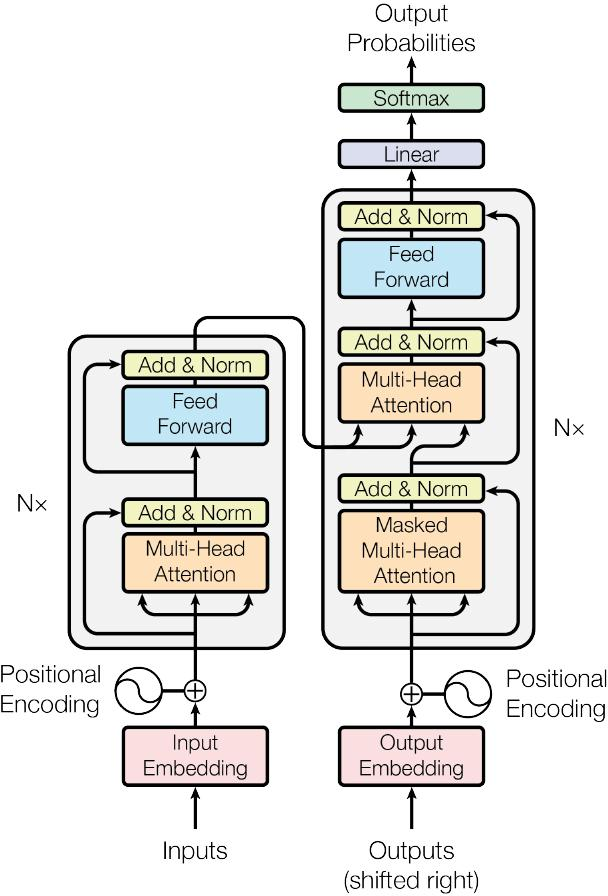

**Image 1 Description**:

The image shows a detailed architectural diagram of a Transformer model used in neural networks. The diagram is vertically oriented and split into two main parallel paths - an encoder stack (left) and a decoder stack (right). Each stack is marked with "Nx" indicating multiple layers. The left path begins with "Input Embedding" and "Positional Encoding", followed by repeated blocks containing "Multi-Head Attention" and "Feed Forward" layers with "Add & Norm" connections. The right path has a similar structure but includes an additional "Masked Multi-Head Attention" layer. The diagram culminates at the top with "Linear" and "Softmax" layers, producing the final "Output Probabilities".

**Image 2:**

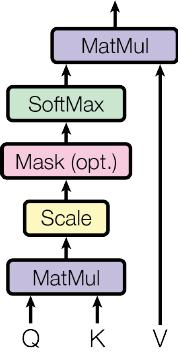

**Image 2 Description**:

The image shows a vertical flowchart or diagram illustrating the Transformer's attention mechanism components. At the bottom, there are three input arrows labeled 'Q', 'K', and 'V' (Query, Key, and Value). These inputs feed into a 'MatMul' (Matrix Multiplication) operation represented by a purple box. Moving upward, the flow continues through a yellow 'Scale' box, followed by an optional pink 'Mask' layer denoted as 'Mask (opt.)'. The diagram then shows a green 'SoftMax' operation, and finally concludes with another purple 'MatMul' box at the top. The diagram effectively illustrates the sequential steps of the attention computation in transformer architectures.

**Image 3:**

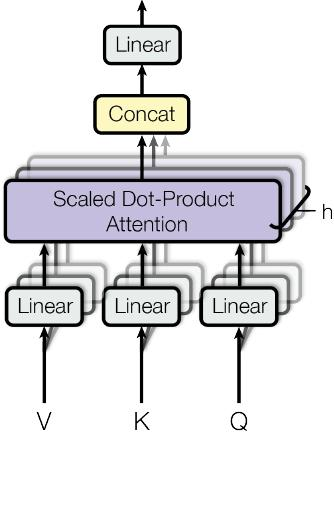

**Image 3 Description**:

The image shows a diagram of a multi-head attention mechanism in the transformer architecture. At the bottom, there are three parallel inputs labeled "V", "K", and "Q" (representing Values, Keys, and Queries). Each input feeds into its own Linear layer, represented by rectangular boxes. Above these Linear layers are multiple stacked purple rectangles labeled "Scaled Dot-Product Attention" with an annotation "h" indicating multiple attention heads. These attention blocks feed into a "Concat" layer represented by a beige box, which then connects to a final "Linear" layer at the top of the diagram. Gray arrows show the flow of information between components, with multiple parallel paths indicating the multi-head nature of the attention mechanism.

**Image 4:**

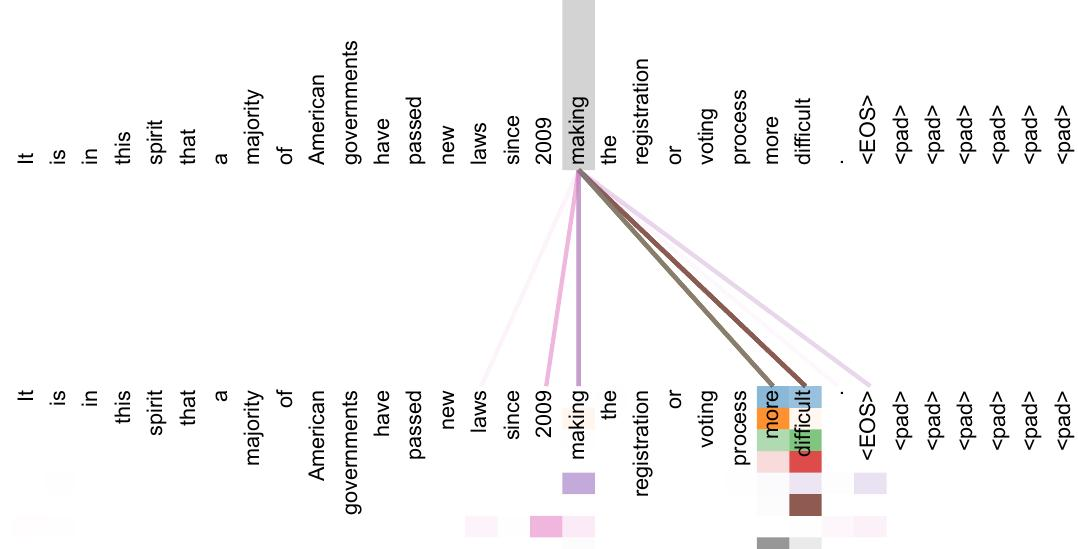

**Image 4 Description**:

This image appears to be a visualization of attention patterns or connections in a transformer model, specifically showing how different tokens attend to each other. The image shows a series of words or tokens on both axes, with colored lines connecting them to indicate attention weights. The words visible include common English terms like "it", "is", "in", "this", "spirit", and others, extending to specialized tokens like "<pad>" and "<EOS>". The attention patterns are represented by lines in different colors - pink, brown, and gray - showing varying strengths of connections between different tokens. The visualization also includes some color-coded blocks near terms like "more" and "difficult", suggesting different levels of attention or importance in those regions.

**Image 5:**

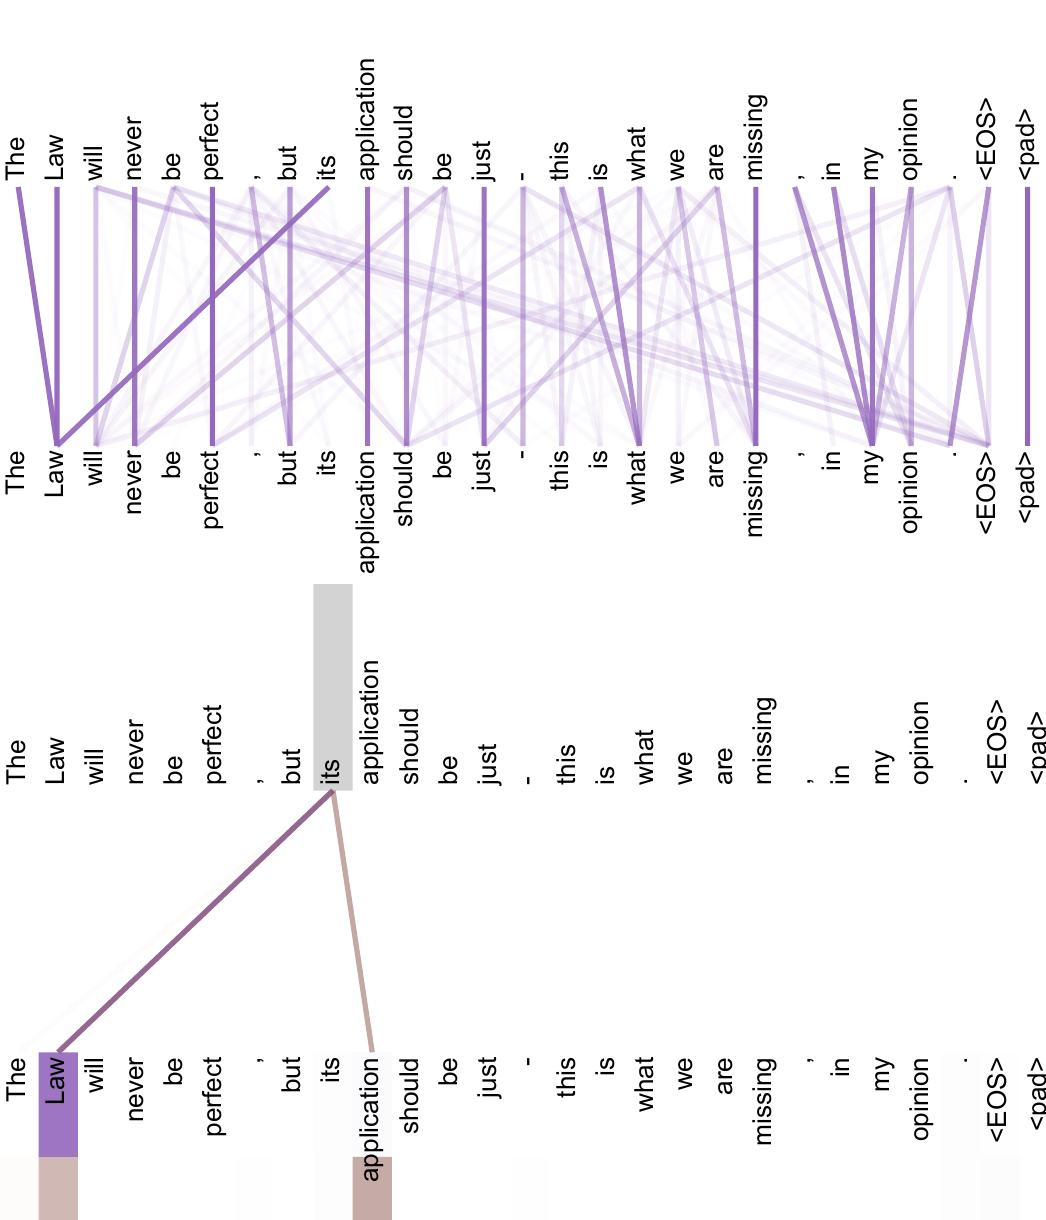

**Image 5 Description**:

The image shows a visualization of attention patterns in a transformer model, specifically displaying self-attention connections between words in a sentence. The visualization is presented in three identical horizontal rows of text, with purple lines connecting different words to show their attention relationships. At the bottom of the image, there are highlighted bars under certain words, likely indicating specific attention points or weights. The text appears to be a partial sentence containing words like "The", "Law", "will", "never", "application", "should" and other connecting words. The purple lines vary in intensity, with some connections appearing stronger (darker purple) than others (lighter purple), demonstrating the varying strengths of attention between different words in the sequence.

**Image 6:**

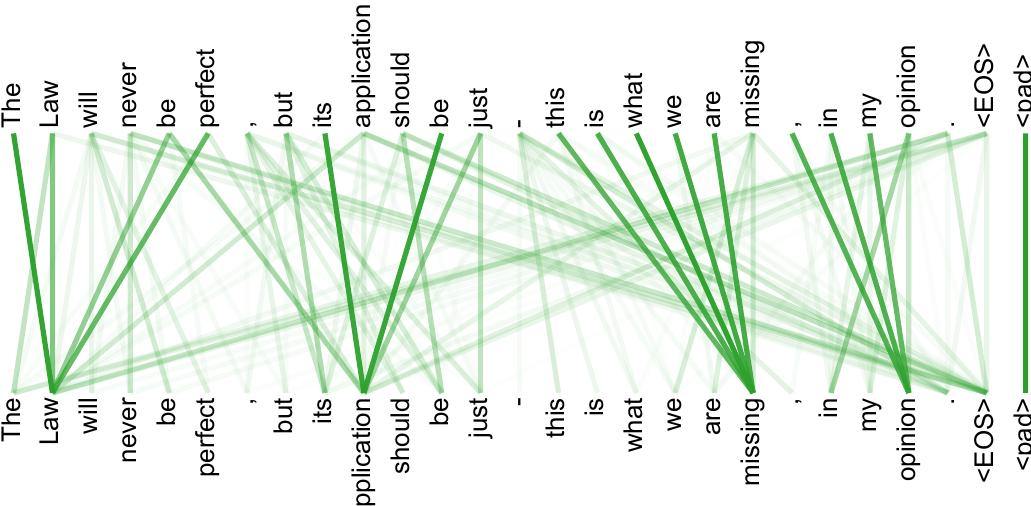

**Image 6 Description**:

The image shows a self-attention visualization pattern from a transformer model, displayed as a bipartite graph structure. The visualization consists of two parallel rows of words or tokens, with green lines connecting them to show attention weights. The text appears to be a sentence fragment including words like "The", "Law", "will", "never", "be", "perfect", with varying degrees of connection intensity shown by the brightness and thickness of the green lines. The connections form a complex network pattern that demonstrates how each word attends to other words in the sequence. Some connections appear stronger (shown by darker green lines) while others are fainter, indicating the varying strengths of attention between different parts of the text.

**Image 7:**

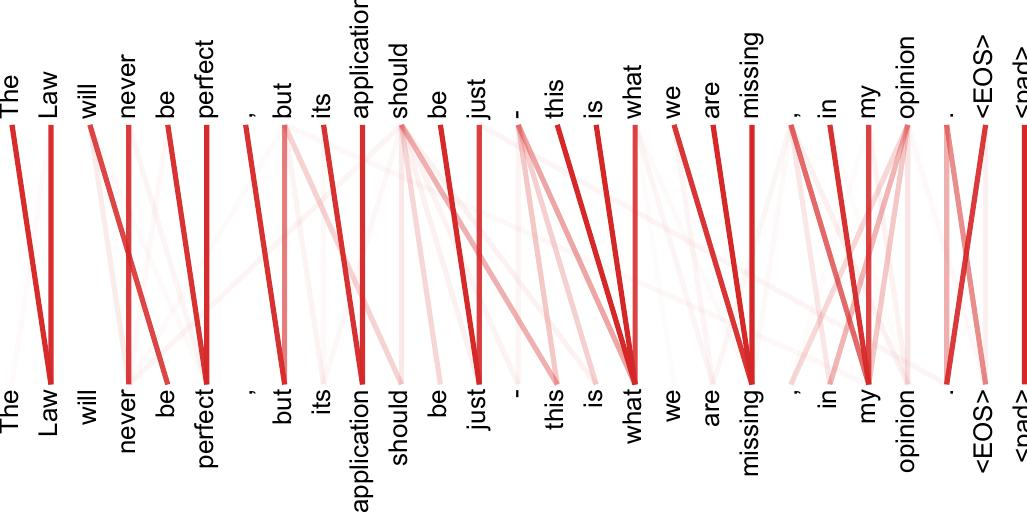

**Image 7 Description**:

The image shows an attention visualization pattern in the form of a connection diagram. It consists of red lines of varying intensity connecting words in two identical sequences at the top and bottom of the image. The words appear to be part of a sentence, including terms like "The", "Law", "will", "never", "be", "perfect", and others. The connecting lines represent attention weights between words, with darker red lines indicating stronger attention connections. This type of visualization is commonly used in transformer models to show how different words attend to or relate to each other during processing. The diagonal pattern of darker lines suggests that words often pay strong attention to themselves and their immediate neighbors.

In [70]:
from IPython.display import Markdown, display

for i, item in enumerate(images):
    image_node, _ = ImageDescriber(instructor_client).describe(item)
    display(Markdown(f"**Image {i+1}:**"))
    display_base64_image(item)
    display(Markdown(f"**Image {i+1} Description**:"))
    display(Markdown(image_node.description))